## resample

In [1]:
import warnings
import numpy as np
import scipy.stats as stats
import pandas as pd
from resample import permutation, bootstrap, utils
from sklearn.datasets import load_boston
import seaborn as sns

warnings.simplefilter("ignore")

## Basic Functionality

In [2]:
x = np.random.randn(25)
x

array([-0.77372008, -0.62165242, -0.11751952,  0.53494397,  1.46339555,
       -1.64514984, -1.2570796 , -0.61207131, -1.02946214, -1.06783493,
       -0.38757417, -1.60524569,  1.09798325, -0.12147104, -0.17936334,
        1.32612682,  0.27854015,  0.93293602,  0.58280674, -1.73636661,
        0.89594826, -0.2337346 , -0.52110893,  0.46047334,  0.29781133])

The default is a balanced bootstrap.  This means that each element has the same distribution over all bootstrap samples as in the original sample (this is a variance reduction technique).

In [3]:
bootstrap.bootstrap(x)

array([[ 0.89594826,  1.46339555,  0.29781133, ..., -1.02946214,
         1.32612682,  0.93293602],
       [ 0.46047334, -0.62165242,  0.29781133, ...,  0.89594826,
         0.89594826,  1.09798325],
       [-1.60524569, -0.11751952,  0.53494397, ...,  0.93293602,
        -1.60524569,  0.29781133],
       ...,
       [-0.2337346 ,  0.27854015, -0.52110893, ..., -0.62165242,
        -0.2337346 ,  0.53494397],
       [ 1.32612682, -0.77372008, -1.60524569, ..., -0.17936334,
         0.93293602, -1.73636661],
       [ 0.27854015, -1.06783493,  1.46339555, ..., -0.17936334,
         1.46339555, -1.73636661]])

Ordinary sampling with replacement can be done by modifying the `method` argument

In [4]:
bootstrap.bootstrap(x, method="ordinary")

array([[-1.06783493,  0.89594826, -1.06783493, ...,  1.32612682,
         0.27854015, -1.73636661],
       [-1.2570796 ,  0.93293602, -0.77372008, ..., -0.2337346 ,
        -0.11751952, -1.02946214],
       [-0.12147104, -1.73636661, -1.64514984, ...,  1.09798325,
        -0.77372008,  0.89594826],
       ...,
       [-0.17936334, -1.02946214, -0.17936334, ..., -0.12147104,
         0.27854015,  0.46047334],
       [-0.17936334,  1.46339555, -1.2570796 , ..., -0.2337346 ,
         1.09798325, -1.02946214],
       [ 0.58280674, -0.12147104, -1.73636661, ...,  1.32612682,
         0.29781133,  0.93293602]])

An optional function `f` can be applied to each bootstrap sample

In [5]:
bootstrap.bootstrap(x, f=np.var, b=10)

array([0.61204321, 0.98011874, 0.71774738, 0.89202181, 0.91319184,
       0.77154049, 0.87210944, 0.94414793, 0.70381792, 0.83254889])

`f` can have any return value, the only requirement is that it accept the bootstrapped elements as inputs.  Here we return an entire dictionary of summary statistics.

In [6]:
def summary(s):
    return {"min": np.min(s),
            "median": np.median(s),
            "iqr": stats.iqr(s),
            "max": np.max(s)}

bootstrap.bootstrap(x, f=summary, b=10)

array([{'min': -1.6052456904314485, 'median': -0.121471040081501, 'iqr': 1.1948780546474551, 'max': 1.4633955504694294},
       {'min': -1.736366606773231, 'median': -0.11751951690159054, 'iqr': 1.103915673779697, 'max': 1.4633955504694294},
       {'min': -1.736366606773231, 'median': -0.5211089323053049, 'iqr': 1.3463750809914494, 'max': 1.4633955504694294},
       {'min': -1.736366606773231, 'median': -0.121471040081501, 'iqr': 1.072544657489776, 'max': 1.4633955504694294},
       {'min': -1.6451498420936803, 'median': -0.621652420263393, 'iqr': 0.6802607535584368, 'max': 1.4633955504694294},
       {'min': -1.6451498420936803, 'median': 0.4604733443167129, 'iqr': 1.1666706134059734, 'max': 1.3261268241981181},
       {'min': -1.736366606773231, 'median': -0.121471040081501, 'iqr': 1.082125764580106, 'max': 1.4633955504694294},
       {'min': -1.736366606773231, 'median': -0.612071313173063, 'iqr': 1.3272734701432358, 'max': 1.4633955504694294},
       {'min': -1.736366606773231, 'm

Bootstrapping of higher-dimensional arrays is also possible, with resampling always occuring along the $0^{\text{th}}$ axis (rows in the case of a two dimensional array)

In [7]:
x = np.random.normal(size=(10, 2))
x

array([[ 2.28403489, -0.22329021],
       [-0.92655809,  0.50053913],
       [-0.26522251,  0.61427015],
       [-0.06370871,  0.20741074],
       [ 0.35839485,  1.14578809],
       [ 0.90386207,  1.14399738],
       [ 0.33167855,  0.2947607 ],
       [-0.53612408, -0.66518153],
       [ 1.32860764, -0.24671515],
       [-0.65173351,  0.2485499 ]])

In [8]:
bootstrap.bootstrap(x, b=3)

array([[[ 0.90386207,  1.14399738],
        [-0.06370871,  0.20741074],
        [-0.65173351,  0.2485499 ],
        [ 0.33167855,  0.2947607 ],
        [-0.06370871,  0.20741074],
        [-0.65173351,  0.2485499 ],
        [ 0.35839485,  1.14578809],
        [-0.65173351,  0.2485499 ],
        [-0.53612408, -0.66518153],
        [ 0.90386207,  1.14399738]],

       [[ 0.33167855,  0.2947607 ],
        [ 0.33167855,  0.2947607 ],
        [ 2.28403489, -0.22329021],
        [ 0.35839485,  1.14578809],
        [-0.26522251,  0.61427015],
        [ 2.28403489, -0.22329021],
        [ 2.28403489, -0.22329021],
        [ 0.90386207,  1.14399738],
        [-0.92655809,  0.50053913],
        [-0.53612408, -0.66518153]],

       [[-0.92655809,  0.50053913],
        [-0.26522251,  0.61427015],
        [-0.26522251,  0.61427015],
        [-0.53612408, -0.66518153],
        [-0.06370871,  0.20741074],
        [ 1.32860764, -0.24671515],
        [ 1.32860764, -0.24671515],
        [-0.92655809,  0

`bootstrap` can be called on any array-like object

In [9]:
bootstrap.bootstrap(list("abcd"), b=10)

array([['c', 'a', 'c', 'c'],
       ['c', 'b', 'd', 'd'],
       ['a', 'b', 'b', 'c'],
       ['c', 'a', 'a', 'a'],
       ['c', 'b', 'b', 'd'],
       ['d', 'd', 'b', 'b'],
       ['a', 'c', 'd', 'c'],
       ['a', 'd', 'd', 'b'],
       ['c', 'a', 'd', 'd'],
       ['a', 'b', 'a', 'b']], dtype='<U1')

In [10]:
bootstrap.bootstrap([{"a": 1, "b": 2}, {"a", 5}, {"c": 5, "d": 3}], b=10)

array([[{'a': 1, 'b': 2}, {'a', 5}, {'c': 5, 'd': 3}],
       [{'a', 5}, {'a': 1, 'b': 2}, {'a': 1, 'b': 2}],
       [{'a': 1, 'b': 2}, {'c': 5, 'd': 3}, {'a': 1, 'b': 2}],
       [{'a', 5}, {'a': 1, 'b': 2}, {'a', 5}],
       [{'c': 5, 'd': 3}, {'a', 5}, {'c': 5, 'd': 3}],
       [{'a': 1, 'b': 2}, {'c': 5, 'd': 3}, {'a', 5}],
       [{'a': 1, 'b': 2}, {'a': 1, 'b': 2}, {'c': 5, 'd': 3}],
       [{'a', 5}, {'c': 5, 'd': 3}, {'c': 5, 'd': 3}],
       [{'c': 5, 'd': 3}, {'a', 5}, {'a': 1, 'b': 2}],
       [{'c': 5, 'd': 3}, {'a', 5}, {'a', 5}]], dtype=object)

This includes `numpy` arrays of arbitrary dimension

In [11]:
x = np.random.normal(size=(32, 16, 8, 4, 2))
bootstrap.bootstrap(x).shape

(100, 32, 16, 8, 4, 2)

#### Confidence intervals

The `bootstrap_ci` function provides implementations of various methods for calculating bootstrap confidence intervals (percentile, BCA and bootstrap $t$ at the moment)

In [12]:
x = np.random.randn(25)
x

array([-0.79092344,  0.36472271, -0.05421119, -0.27594493, -0.02902924,
       -0.95952145, -0.022436  , -0.6370593 , -0.62727171, -0.92949044,
       -1.64787815, -0.71205566, -1.57974024,  0.16834629,  0.56443727,
        1.60185948,  1.37781068,  1.73685296,  0.60987075, -1.04979789,
        1.02023457, -1.95545659, -0.67392452, -0.57206091,  2.39361911])

The default is a percentile interval

In [13]:
bootstrap.bootstrap_ci(x, f=np.var)

(0.5885340931056833, 1.6641111015361862)

The `ci_method` argument controls the confidence interval method

In [14]:
ci = bootstrap.bootstrap_ci(x, f=np.var, b=10000, ci_method="percentile", random_state=2357)
ci

(0.5945229223186204, 1.7371716647072817)

In [15]:
ci[1] - ci[0]

1.1426487423886613

Bias-corrected and accelerated

In [16]:
ci = bootstrap.bootstrap_ci(x, f=np.var, b=10000, ci_method="bca", random_state=2357)
ci

(0.798983479629268, 1.8287608797950612)

In [17]:
ci[1] - ci[0]

1.029777400165793

Bootstrap $t$ (the Studentized bootstrap)

In [18]:
ci = bootstrap.bootstrap_ci(x, f=np.var, b=10000, ci_method="t", random_state=2357)
ci

(0.7300699521752501, 1.696406956803171)

In [19]:
ci[1] - ci[0]

0.9663370046279209

#### Tools for working with empirical distributions

In [20]:
x = np.random.randn(100)
x

array([ 1.01699980e+00,  8.73984025e-01,  3.01531931e-01, -2.91570945e-01,
        4.72285801e-01, -1.23614647e+00,  1.28876413e+00,  4.30371423e-01,
       -8.67533193e-02,  4.21641088e-01, -1.15429183e+00, -8.64845212e-01,
       -8.52194242e-01, -1.06587926e-01,  6.33354449e-01,  2.03671265e+00,
        1.13097451e+00,  1.39035094e+00,  2.03806868e+00, -5.70558788e-01,
        1.71405923e-01, -8.09188494e-01, -2.00102887e+00,  1.98594535e-01,
       -6.02769183e-01,  1.50128720e-01,  1.11956145e+00,  4.86258370e-01,
       -9.52260616e-01, -1.64868266e-01,  4.21291948e-01, -1.35783088e+00,
        2.49469159e-03,  1.07039058e+00, -4.67556098e-01, -8.83079471e-01,
       -4.95327447e-01, -2.28553456e+00,  1.34543240e+00,  5.08003754e-02,
        2.13563248e-01,  4.62451914e-01,  8.90644173e-01, -1.65010954e-01,
       -6.77303253e-01, -8.35885851e-01, -3.63073628e-01, -1.84801521e+00,
       -2.41790838e+00,  2.11268023e+00, -4.98589572e-01,  5.51954660e-01,
       -7.39972564e-01, -

`ecdf` returns the empirical cumulative distribution function of a sample $\{ x_i \}_{i=1}^{n}$

$$
\hat{F}_n(s) = n^{-1} \sum_{i=1}^{n} I(x_i \leq s) .
$$

This represents the proportion of the sample less than or equal to $s$

In [21]:
F = utils.ecdf(x)

In [22]:
F(-1)

0.17

In [23]:
F(0)

0.5

In [24]:
F(1)

0.81

`eqf` returns the empirical quantile function

$$
\hat{G}_n(p) = \hat{F}_n^{-1}(p) ,
$$

or the inverse of `ecdf`.

(This statement is not strictly speaking true since $\hat{F}_n$ is not invertible.  To get around this we use linear interpolation between the observed sample points so that $\hat{F}_n^{-1}$ is well-defined.  The result is that $\hat{G}_n(p)$ is defined for all $p \in [0, 1]$.)

In [25]:
G = utils.eqf(x)

In [26]:
G(0.25)

-0.8091884943786485

In [27]:
G(0.5)

-0.08675331925216213

In [28]:
G(0.75)

0.7492168444739649

## Boston Housing Example

In [29]:
bost = load_boston()
print(bost["DESCR"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [30]:
df = pd.DataFrame(bost["data"], columns=bost["feature_names"])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [31]:
y = pd.Series(bost["target"], name="target")
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

Use `corr_test` to test the significance of the correlation coefficients

In [32]:
df.apply(lambda x: pd.Series(permutation.corr_test(x.values, y.values, b=1000))).T

,c,prop
CRIM,-0.385832,0.0
ZN,0.360445,1.0
INDUS,-0.483725,0.0
CHAS,0.175260,1.0
NOX,-0.427321,0.0
RM,0.695360,1.0
AGE,-0.376955,0.0
DIS,0.249929,1.0
RAD,-0.381626,0.0
TAX,-0.468536,0.0


Use `ttest` to determine if properties along the Charles River are more expensive

In [33]:
permutation.ttest(y[df["CHAS"] == 1], y[df["CHAS"] == 0], b=1000)

{'t': 3.113291312794837, 'prop': 0.999}

`wilcoxon` can be used to test the same hypothesis

In [34]:
permutation.wilcoxon(y[df["CHAS"] == 1], y[df["CHAS"] == 0], b=1000)

{'w': 11509.5, 'prop': 1.0}

Load linear model libraries

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Here we define a function `fitreg` which takes a matrix `A` that contains both predictors and a response variable and returns the least squares coefficients of the predictors along with an intercept.  Note how the standardization is actually performed *inside* the function.  This means that the measures of center and scale (which are in fact model parameters) are estimated at every iteration, and so any variation in the coefficients that is induced by this process can be accounted-for by the bootstrapping process.  In theory a full modeling workflow can be defined as a function which can then be bootstrapped.

In [36]:
def fitreg(A):
    scale = StandardScaler()
    reg = LinearRegression(fit_intercept=True)
    X_scale = scale.fit_transform(A[:, :A.shape[1]-2])
    y = A[:, A.shape[1]-1]
    reg.fit(X_scale, y)
    return {"coef": reg.coef_, "intercept": reg.intercept_}

Apply the function to 5,000 bootstrap copies of the Boston housing data.  The output is an array of dictionaries containing the coefficients and intercept for each data set.  We then wrap this array into a `pandas` `DataFrame`.

In [37]:
boot_coef = bootstrap.bootstrap(a=df.join(y).values, f=lambda s: fitreg(s), b=5000, random_state=2357)
boot_coef[:3]

array([{'coef': array([-1.24940008,  0.4521016 , -0.12226851,  0.49288441, -2.15744612,
        4.35705272, -0.62892876, -2.66174889,  2.71151405, -1.62770767,
       -2.29904926,  1.67548978]), 'intercept': 22.62193675889331},
       {'coef': array([-1.98340371,  1.1962473 , -0.54160658,  1.49201159, -3.36253846,
        3.21354932, -0.99205584, -3.63673274,  2.9456833 , -1.18162618,
       -1.91532297,  1.51572313]), 'intercept': 22.14584980237155},
       {'coef': array([-1.34135503,  0.61075114, -0.44502036,  0.77009715, -3.66622407,
        4.28706396, -0.80467974, -4.41104731,  2.62514328, -1.77952508,
       -2.65794962,  1.17814286]), 'intercept': 22.486956521739145}],
      dtype=object)

In [38]:
param_frame = pd.DataFrame([pd.Series(x) for x in boot_coef])
param_frame.head()

,coef,intercept
0,"[-1.2494000801862717, 0.452101603479378, -0.12...",22.621937
1,"[-1.9834037094578212, 1.1962473015460426, -0.5...",22.145850
2,"[-1.3413550287062634, 0.6107511396410703, -0.4...",22.486957
3,"[-1.0252065314677028, 0.9423924278334428, 0.16...",22.636957
4,"[-0.7618402285907614, 0.9359590077955342, -0.4...",22.729644


Extract the coefficients for the `CRIM` variable and plot the histogram

In [39]:
crim_coef = param_frame["coef"].map(lambda x: x[0])

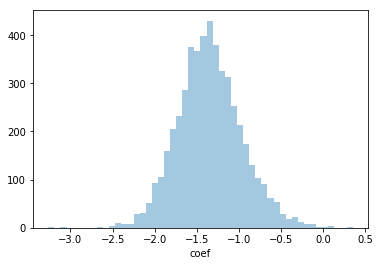

In [40]:
sns.distplot(crim_coef, kde=False)

Extract endpoints of percentile bootstrap confidence interval

In [41]:
q = utils.eqf(crim_coef)

In [42]:
(q(0.025), q(0.975))

(-2.0578162377452105, -0.5423771568162123)

Bootstrap confidence interval of correlation coefficient between `CRIM` and `target`

In [43]:
bootstrap.bootstrap_ci(a=df[["CRIM"]].join(y).values,
                       f=lambda x: np.corrcoef(x[:, 0], x[:, 1])[0, 1],
                       p=0.95,
                       b=10000,
                       ci_method="percentile",
                       random_state=2357)

(-0.4494642322683301, -0.3335249121379983)